In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
import io

In [2]:
path_1 = "/content/drive/MyDrive/Scunia Truck/aps_failure_training_set.csv"
path_2 = '/content/drive/MyDrive/Scunia Truck/aps_failure_test_set.csv'

In [3]:
train = pd.read_csv(path_1, na_values="na")


In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
train.shape

(60000, 171)

In [6]:
train.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [7]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [8]:
train['class'].unique()

array(['neg', 'pos'], dtype=object)

In [9]:
train['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

 This data is highly imbalances as the negative observations are more than that of the positive observation

In [10]:
def get_correct_label(y):
    """
    This function converts the class labels from 'neg' and 'pos' to 0 and 1 respectively
    """
    return y.replace(['neg','pos'],[0,1])

print(train['class'].unique())
train['class'] = get_correct_label(train['class'])
print(train['class'].unique())

['neg' 'pos']
[0 1]


In [11]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [12]:
# Checking missing values
train.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [13]:
# Checking missing values
train.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

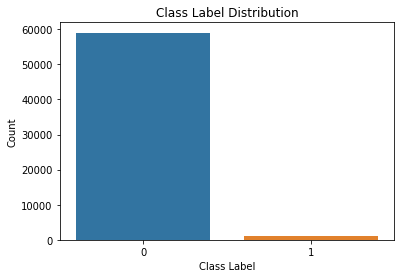

In [14]:
sns.barplot(train['class'].unique(),train['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

**TEST DATA**

In [15]:
test = pd.read_csv(path_2, na_values="na", header = 20)
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [16]:
test.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,...,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8.560355e+03,0.064969,0.242683
std,5.035350e+05,2.589224,7.966968e+08,1551.328109,118.186469,167.260463,6454.660300,8.925778e+04,2.358405e+05,1.025843e+06,...,1.255197e+06,5.828691e+05,1.267550e+06,1.259560e+06,1.199544e+06,1.628545e+06,5.368225e+05,5.329946e+04,3.374657,14.339059
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.280000e+02,0.000000,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.178000e+03,1.256000e+03,2.883500e+03,3.869500e+03,6.100000e+02,1.240000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.098200e+04,0.000000,1.590000e+02,130.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.409860e+05,1.147800e+05,2.297080e+05,1.956510e+05,9.657000e+04,4.201300e+04,3.985000e+03,0.000000e+00,0.000000,0.000000
75%,4.947900e+04,0.000000,1.003500e+03,430.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.391320e+05,2.189510e+05,4.714860e+05,4.034105e+05,2.790355e+05,1.699100e+05,1.389310e+05,1.907000e+03,0.000000,0.000000
max,4.294967e+07,58.000000,2.130707e+09,87038.000000,11044.000000,14186.000000,736174.000000,1.047252e+07,1.914916e+07,7.305747e+07,...,5.382333e+07,2.207969e+07,4.859750e+07,5.604348e+07,4.215944e+07,4.747137e+07,1.718575e+07,4.570398e+06,340.000000,1720.000000


In [17]:
test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

This also is an imbalamced dataset

In [18]:
# Checking missing values
test.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [19]:
# Checking missing values
test.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64

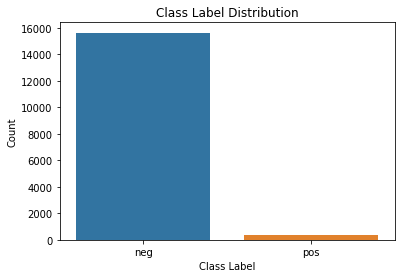

In [20]:
sns.barplot(test['class'].unique(),test['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [21]:
print(test['class'].unique())
test['class'] = get_correct_label(test['class'])
print(test['class'].unique())

['neg' 'pos']
[0 1]


In [22]:
print(train['class'].value_counts())
print(test['class'].value_counts())

0    59000
1     1000
Name: class, dtype: int64
0    15625
1      375
Name: class, dtype: int64


## Null Data

In [23]:
train.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [24]:
train_num = train.drop('class', axis =1)

In [25]:
train_num.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [26]:
for col in train_num:
        # Complete missing col with mean
        train_num[col].fillna(train_num[col].mean(), inplace = True)

In [27]:
train_num.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [28]:
train_num.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [29]:
train.corr()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.000000,0.536978,0.031896,-0.036533,-0.000415,0.008873,0.022532,0.012368,0.191453,0.340611,...,0.445155,0.430045,0.417192,0.487019,0.416299,0.160580,0.235880,0.116099,0.018400,0.017526
aa_000,0.536978,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ab_000,0.031896,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,...,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
ac_000,-0.036533,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.000415,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.160580,0.606232,0.023867,-0.029417,-0.000829,0.052357,0.070306,0.000307,0.044186,0.182990,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000715,0.002708
ee_008,0.235880,0.471707,0.039369,0.016908,-0.002161,-0.010850,-0.013976,-0.000823,0.004878,0.009466,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.006991,-0.002833
ee_009,0.116099,0.248039,0.074119,0.024354,-0.001050,-0.008206,-0.010237,-0.001230,-0.004309,-0.009498,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003942,-0.000907
ef_000,0.018400,0.019865,0.055590,-0.006571,-0.000102,0.070886,0.106281,-0.000072,0.002875,0.011824,...,0.007118,0.017480,0.005835,0.050270,0.008461,-0.000715,-0.006991,-0.003942,1.000000,0.282184


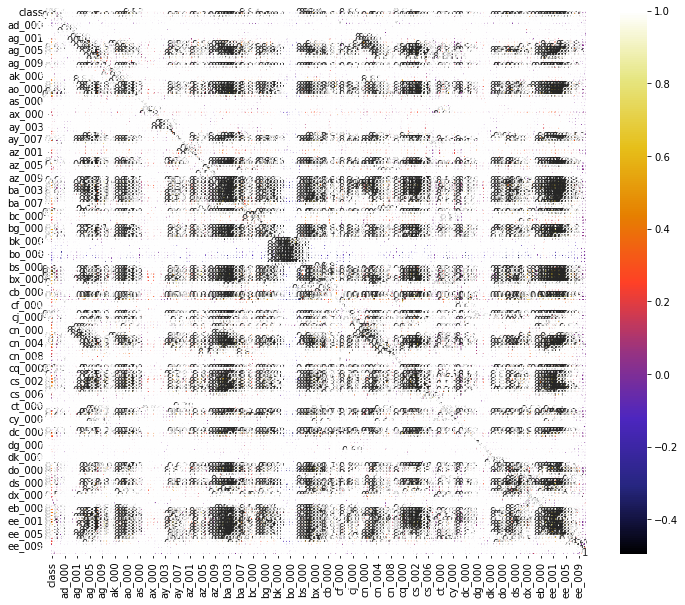

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap="CMRmap", annot=True)

## Handling the Imbalance in the Dataset

In [31]:
from imblearn.over_sampling import SMOTE
train['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [32]:
#Oversampling

y = train['class']
X = train_num

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [33]:
y.value_counts()

0    59000
1    59000
Name: class, dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = list(X.columns))

In [35]:
X.head()


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.027925,0.003496,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.003496,0.000000e+00,2.220573e-05,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,0.003496,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,0.000000,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,0.003496,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


# Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaler

StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)

In [40]:
x_test = scaler.transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [42]:
log_reg = LogisticRegression()
log_reg
log_reg.fit(x_train, y_train)
y_predict = log_reg.predict(x_test)
accuracy_log = accuracy_score(y_test, y_predict)
accuracy_log

0.9681864406779661

#### Confusion Matrix

In [43]:
confusion_mat = confusion_matrix(y_test, y_predict)
confusion_mat

array([[28895,   680],
       [ 1197, 28228]])

In [44]:
TP = confusion_mat[0][0]
FP = confusion_mat[0][1]
FN = confusion_mat[1][0]
TN = confusion_mat[1][1]

In [45]:
acc_score = (TP+TN)/(TP+FP+FN+TN)
acc_score

0.9681864406779661

In [46]:
Pre_sco= round(TP/(TP+FP),4)
Pre_sco

0.977

In [47]:
rec_sco = round(TP/(TP+FN), 4)
rec_sco

0.9602

In [48]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     30092
           1       0.96      0.98      0.97     28908

    accuracy                           0.97     59000
   macro avg       0.97      0.97      0.97     59000
weighted avg       0.97      0.97      0.97     59000



#### Hyperparameter Tuniung

In [49]:
parameter = [{'penalty': ['l1', ' l2']},
             {"C":[1, 10, 100, 1000]}]

In [50]:
grid_search= GridSearchCV(estimator = log_reg, param_grid = parameter, scoring='accuracy', cv = 5, verbose =0)

In [51]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', ' l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [52]:
grid_search.best_params_

{'C': 100}

In [53]:
log_class = LogisticRegression(C=100)
log_class.fit(x_train, y_train)
y_predict_hyper = log_class.predict(x_test)
accuracy_score(y_test, y_predict_hyper)

0.9686271186440678

In [54]:
## AUC-ROC
y_test_pred = log_class.predict_proba(x_test)
roc_auc_score(y_test, y_test_pred[:,1])

0.9926304694586506

In [55]:
print(classification_report(y_test, y_predict_hyper))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29575
           1       0.98      0.96      0.97     29425

    accuracy                           0.97     59000
   macro avg       0.97      0.97      0.97     59000
weighted avg       0.97      0.97      0.97     59000



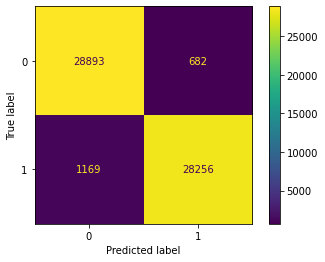

In [56]:
plot_confusion_matrix(log_class, x_test, y_test)
plt.show()

# **SVC**

In [57]:
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_predict_svc = model_svc.predict(x_test)
accuracy_score(y_test, y_predict_svc)

0.9763220338983051

In [58]:
# AUC-ROC
y_predict_svc_auc = model_svc.predict(x_test)
roc_auc_score(y_test, y_predict_svc_auc)

0.9763047735873042

# **Decision Tree**

In [59]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_predict_dt = model_dt.predict(x_test)

In [60]:
accuracy_score(y_test, y_predict_dt)

0.9889830508474576

In [61]:
model_dt_hyper = DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_leaf= 5, min_samples_split= 6)
model_dt_hyper.fit(x_train, y_train)
y_predict_dt_hyper = model_dt_hyper.predict(x_test)
accuracy_score(y_test, y_predict_dt_hyper)

0.9701694915254238

In [62]:
#AUC-ROC
y_predict_dt_auc = model_dt_hyper.predict_proba(x_test)
roc_auc_score(y_test,y_predict_dt_auc[:,1])

0.9867703431004653

In [63]:
print(classification_report(y_test,y_predict_dt_hyper))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29575
           1       0.97      0.97      0.97     29425

    accuracy                           0.97     59000
   macro avg       0.97      0.97      0.97     59000
weighted avg       0.97      0.97      0.97     59000



# **Random Forest**

In [64]:
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(x_train, y_train)
y_predict_rf  = model_rf.predict(x_test)
accuracy_score(y_test, y_predict_rf)

0.9455593220338983

In [65]:
## AUC_ROC
y_predict_rf_auc = model_rf.predict_proba(x_test)
roc_auc_score(y_test, y_predict_rf_auc[:,1])

0.9842353568789226

In [66]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     29575
           1       0.94      0.95      0.95     29425

    accuracy                           0.95     59000
   macro avg       0.95      0.95      0.95     59000
weighted avg       0.95      0.95      0.95     59000



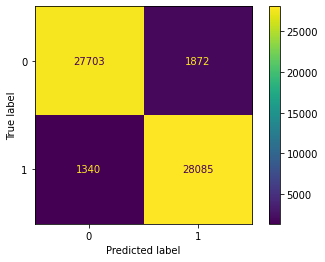

In [85]:
plot_confusion_matrix(model_rf, x_test, y_test)
plt.show()

# **Adaboost**

In [86]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)
y_predict_ada = model_ada.predict(x_test)
accuracy_score(y_test, y_predict_ada)

0.9773389830508474

In [87]:
#Auc_Roc
y_predict_ada_auc = model_ada.predict_proba(x_test)
roc_auc_score(y_test,y_predict_ada_auc[:,1])

0.997437960457946

In [88]:
print(classification_report(y_test, y_predict_ada))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29575
           1       0.98      0.98      0.98     29425

    accuracy                           0.98     59000
   macro avg       0.98      0.98      0.98     59000
weighted avg       0.98      0.98      0.98     59000



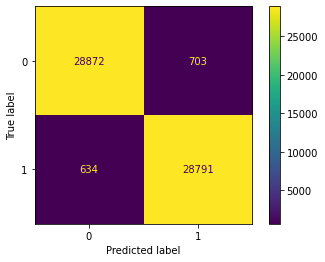

In [90]:
plot_confusion_matrix(model_ada, x_test, y_test)
plt.show()

# **Gradient Boosting**

In [91]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)
y_predict_gb = model_gb.predict(x_test)
accuracy_score(y_test, y_predict_gb)

0.9838983050847457

In [93]:
#Auc_Roc
y_predict_gb_auc = model_gb.predict_proba(x_test)
roc_auc_score(y_test, y_predict_gb_auc[:,1])

0.9987488330504866

In [94]:
print(classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29575
           1       0.98      0.99      0.98     29425

    accuracy                           0.98     59000
   macro avg       0.98      0.98      0.98     59000
weighted avg       0.98      0.98      0.98     59000



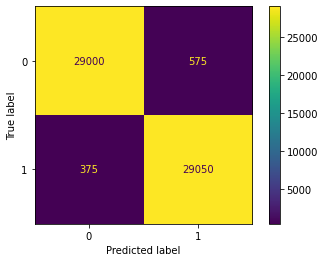

In [95]:
plot_confusion_matrix(model_gb, x_test, y_test)
plt.show()

# **XGBoost**

In [96]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)
y_predict_xgb = model_xgb.predict(x_test)
accuracy_score(y_test, y_predict_xgb)

0.9694745762711865

In [97]:
#Auc_Roc
y_predict_xgb_auc = model_xgb.predict_proba(x_test)
roc_auc_score(y_test, y_predict_xgb_auc[:,1])

0.9935314227110057

In [99]:
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     29575
           1       0.96      0.97      0.97     29425

    accuracy                           0.97     59000
   macro avg       0.97      0.97      0.97     59000
weighted avg       0.97      0.97      0.97     59000



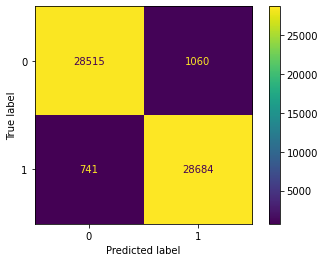

In [101]:
plot_confusion_matrix(model_xgb, x_test, y_test)
plt.show()